<a href="https://colab.research.google.com/github/LOVENISHGAUR/Projects/blob/master/Data_Augmentation_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this technique, we generate new instances of images by cropping, flipping, zooming, shearing an original image. So, whenever the training lacks the image dataset, using augmentation, we can create thousands of images to train the model perfectly.

<h3>Data pre-processing</h3>
1. Import the required libraries.

2. Load the dataset from Keras.

3. Normalize the data.

4. Convert the target into categorical values.

5. Apply data augmentation techniques on the train data.


<h3>Building the model</h3>
1. Construct a basic CNN model without the data augmentation techniques.

2. Construct a CNN model with data augmentation.

3. Evaluate both models and compare the model performance.

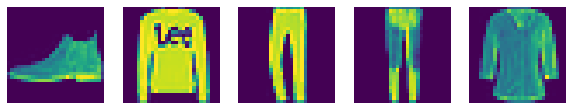

Labels: [9 2 1 1 6]


In [1]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i]) 
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_test[0:5]))

In [2]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

<h2>Data Augmentation</h2>

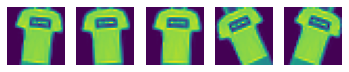

In [4]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

<h2>Build the CNN Model</h2>

In [5]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6467 - accuracy: 0.7616 - val_loss: 0.4569 - val_accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4696 - accuracy: 0.8268 - val_loss: 0.3877 - val_accuracy: 0.8505
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4315 - accuracy: 0.8396 - val_loss: 0.3875 - val_accuracy: 0.8574
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4065 - accuracy: 0.8481 - val_loss: 0.3839 - val_accuracy: 0.8615
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3901 - accuracy: 0.8553 - val_loss: 0.3754 - val_accuracy: 0.8573
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3769 - accuracy: 0.8611 - val_loss: 0.3554 - val_accuracy: 0.8718
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3669 - accuracy: 0.8644 - val_loss: 0.3541 - val_ac

In [6]:
print('Test accuracy:', model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8758
Test accuracy: [0.3390468955039978, 0.8758000135421753]
